<a href="https://colab.research.google.com/github/SuanTay/P3/blob/master/2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/clean.openfoodfacts.csv', sep='\t', low_memory=False)
df.shape


(528953, 17)

In [ ]:
df.columns

Index(['Unnamed: 0', 'code', 'url', 'product_name', 'countries_fr',
       'nutriscore_score', 'nutriscore_grade', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0','product_name',  'countries_fr'], inplace=True)

## Préparation des données

In [ ]:
df.isnull().sum()/len(df)

code                  0.000000
url                   0.000000
nutriscore_score      0.545495
nutriscore_grade      0.545495
pnns_groups_2         0.000000
energy_100g           0.000000
fat_100g              0.000000
saturated-fat_100g    0.000000
carbohydrates_100g    0.000000
sugars_100g           0.000000
fiber_100g            0.000000
proteins_100g         0.000000
salt_100g             0.000000
sodium_100g           0.000000
dtype: float64

on cherche a remlpir les nutri grade :

1.   separer les données entre ceux qui on des nutri grade et ceux qui n'en n'ont pas.
2.   separons les données entre data/target
3.   separons les données  80/20 qui correstonde aux train et test.

In [ ]:
df.columns

Index(['code', 'url', 'nutriscore_score', 'nutriscore_grade', 'pnns_groups_2',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g'],
      dtype='object')

In [ ]:
df.drop(columns=['url', 'nutriscore_score', 'pnns_groups_2'], inplace=True)

In [ ]:
data =df[df['nutriscore_grade'].isnull()==False]
data.shape

(240412, 11)

In [ ]:
data_found =df[df['nutriscore_grade'].isnull()]
data_found.shape

(288541, 11)

In [ ]:
240412 + 288541

528953

In [ ]:
target = data['nutriscore_grade']
target.shape

(240412,)

In [ ]:
data.drop(columns=['nutriscore_grade'], inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_found.drop(columns=['nutriscore_grade'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()

,code,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1,0000000000100,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840
4,0000000000949,134.0,0.3,0.1,5.3,3.9,0.0,0.9,0.42,0.168
10,0000000001281,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040
16,0000000001885,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000
19,0000000002257,598.0,12.7,1.0,3.9,1.0,0.0,1.9,0.27,0.108


In [ ]:
#
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)


In [ ]:
xtrain.shape

(192329, 10)

In [ ]:
xtest.shape

(48083, 10)

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
accuracy =  knn.score(xtest, ytest)
print('Accuracy: %f' % accuracy)

Accuracy: 0.523345


## On cherche la valeur maximal de l'accuracy pour determiner le k Neighbors

findfont: Font family ['college'] not found. Falling back to DejaVu Sans.


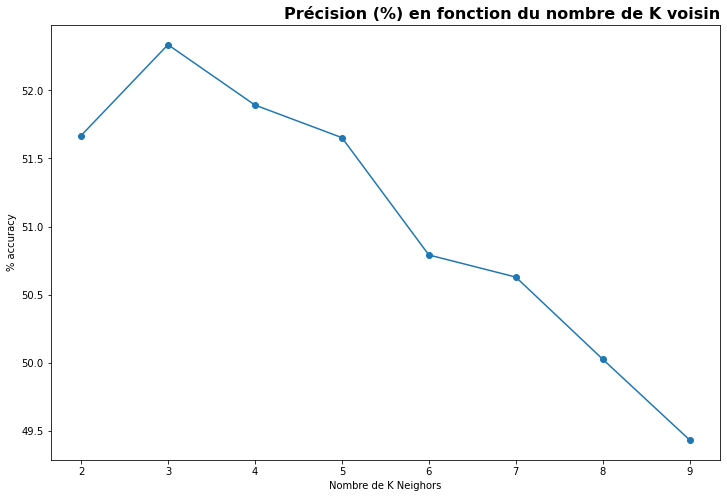

In [ ]:
import matplotlib.pyplot as plt
acuracy = []
for k in range(2,10):
    knn = neighbors.KNeighborsClassifier(k)
    acuracy.append(100*( knn.fit(xtrain, ytrain).score(xtest, ytest)))
    #Acuracy
plt.figure(figsize=(12, 8))
plt.plot(range(2,10), acuracy, 'o-')
plt.title('Précision (%) en fonction du nombre de K voisin',fontdict={'family': 'college', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 16},
          loc='right')
plt.xlabel('Nombre de K Neighors')
plt.ylabel('% accuracy')
#ajouter légende 
plt.show()
#on prend la plus haute

## on prend la plus haute soit un k=3

In [ ]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(data_found)
data_found['nutriscore_grade']=predicted


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data['nutriscore_grade']=target


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.append(data_found)

In [ ]:
data.shape

(528953, 11)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


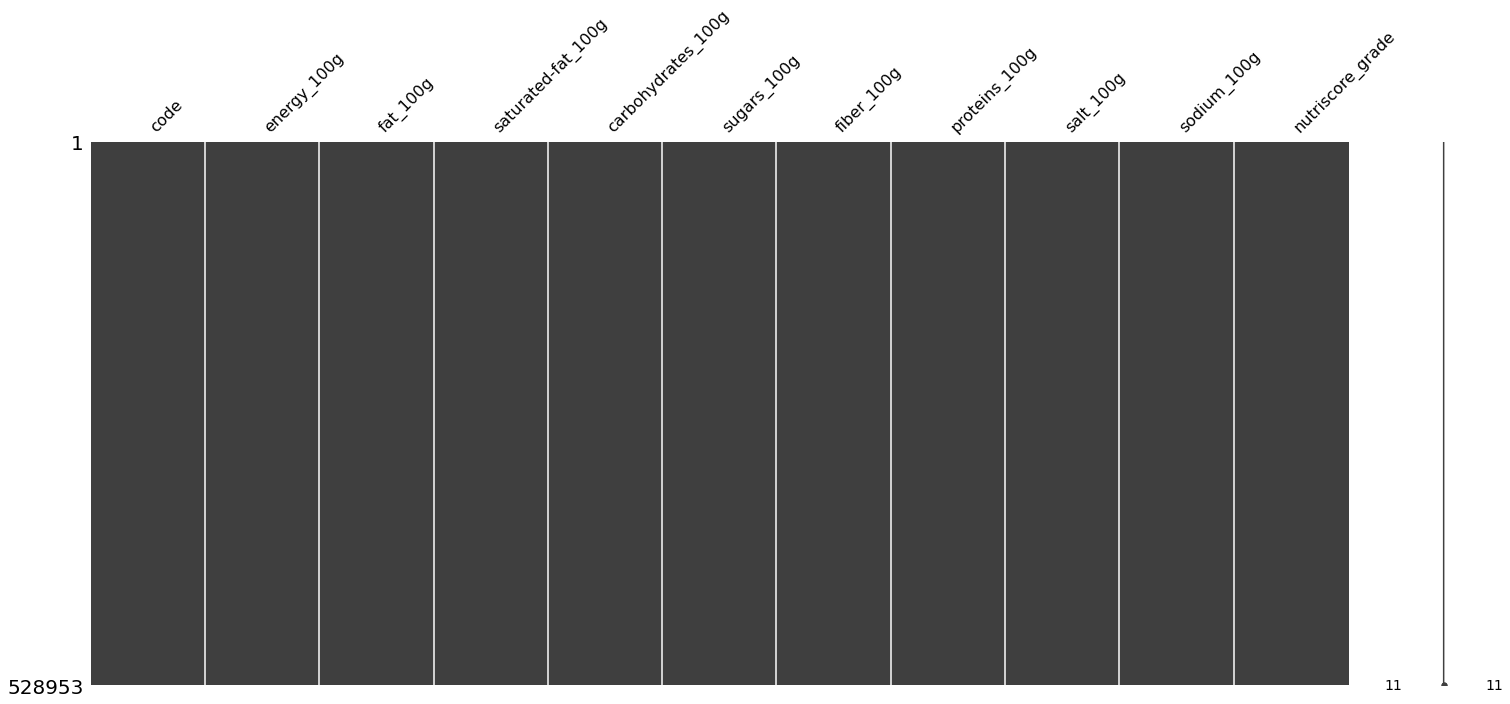

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/knn.nutrigrade.fr.clean.lowfeatures.openfoodfacts.org.products.csv',sep='\t', encoding='utf-8', header=True)

## Merge des données

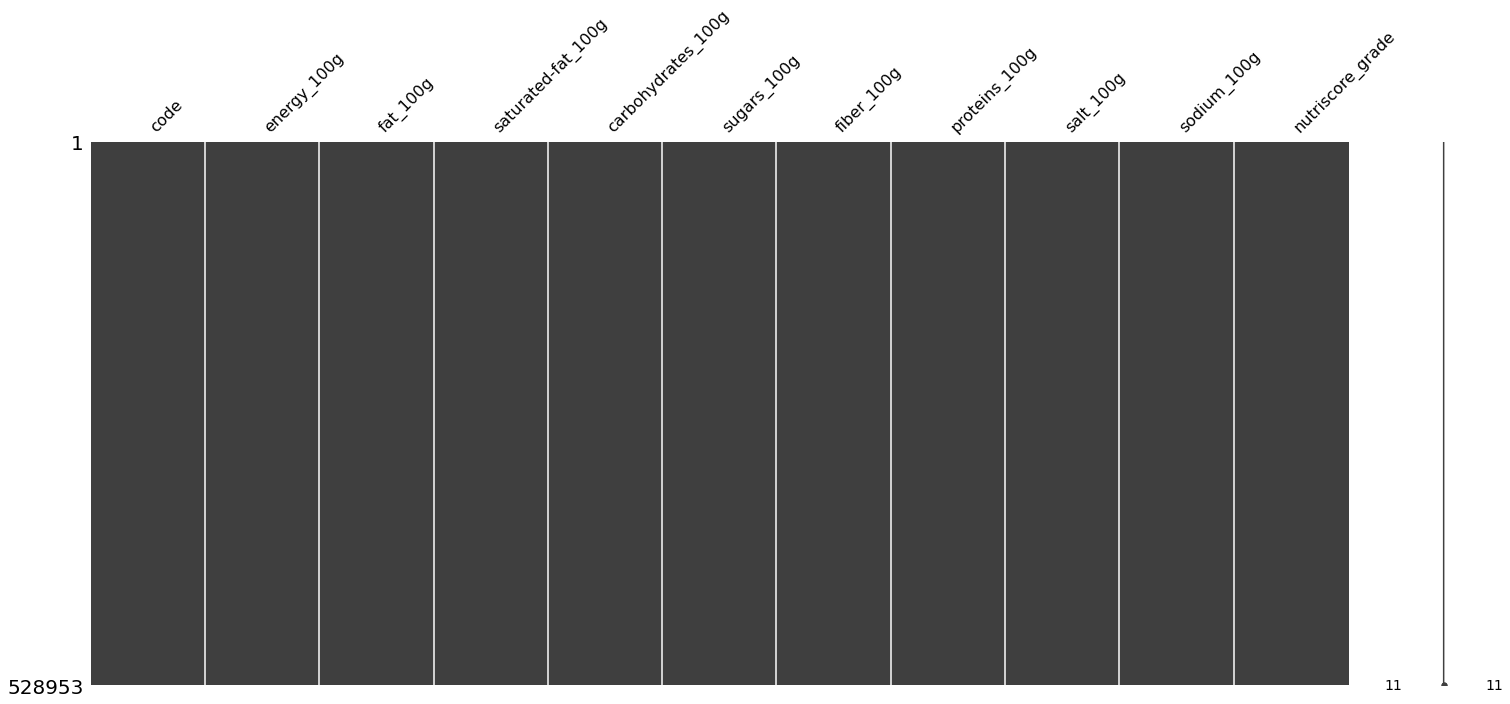

In [ ]:
df2 =pd.merge ( df, data , on=['code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'])
df2.drop(columns= ['nutriscore_grade_x'],inplace=True)
df2 = df2.rename(columns={'nutriscore_grade_y': 'nutriscore_grade'})
msno.matrix(df2)

In [ ]:
df2.to_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/mergeNG.knn.nutriscore.fr.clean.lowfeatures.openfoodfacts.org.products.csv',sep='\t', encoding='utf-8', header=True)

In [ ]:
df2.columns

Index(['code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutriscore_grade'],
      dtype='object')

In [ ]:
dfNG = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fr.openfoodfacts.org.products.csv/mergeNG.knn.nutriscore.fr.clean.lowfeatures.openfoodfacts.org.products.csv', sep='\t', low_memory=False)


In [ ]:
dfNG.columns

Index(['Unnamed: 0', 'code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutriscore_grade'],
      dtype='object')

In [ ]:
data.columns

Index(['code', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')